<a href="https://colab.research.google.com/github/hyeongwooo/alexnet-model/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import pandas as pd
import os,warnings
warnings.filterwarnings("ignore")
from tqdm.keras import TqdmCallback

from PIL import Image
from skimage.io import imread
import imageio
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from keras.utils import load_img,img_to_array
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout

In [ ]:
## Defining batch specfications
batch_size = 256
img_height = 250
img_width = 250

In [ ]:
# load training & validation data
train_folder = '/content/drive/MyDrive/store sign 2/train'
training_data = tf.keras.preprocessing.image_dataset_from_directory(train_folder,seed=42,image_size= (img_height, img_width),batch_size=batch_size)

val_folder = '/content/drive/MyDrive/store sign 2/valid'
validation_data = tf.keras.preprocessing.image_dataset_from_directory(val_folder,seed=42,image_size= (img_height, img_width),batch_size=batch_size)

Found 1906 files belonging to 6 classes.
Found 406 files belonging to 6 classes.


In [ ]:
# target class name list
target_names = training_data.class_names
print(target_names)

['GORENG', '뚝배기스파게티', '빨래방', '아이스크림 할인점', '추억과 김밥', '커피나무']


In [ ]:
# AlexNet Architecture
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (250, 250, 3),
kernel_size = (11, 11), strides = (4, 4),
padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),
strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),
strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# Flattening
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape = (250*250*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# Output Softmax Layer
model.add(Dense(len(target_names)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 60, 60, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 256)         │       2,973,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8, 8, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 6, 6, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │              

 Total params: 27,149,062 (103.57 MB)

 Trainable params: 27,129,926 (103.49 MB)

 Non-trainable params: 19,136 (74.75 KB)

In [ ]:
# model compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
K.clear_session()
fruit_class_model = model.fit(training_data,validation_data= validation_data,epochs = 30, callbacks=[TqdmCallback(verbose=0)], verbose=0)

# save model
model.save("/AlexNet_Model.hdf5")

0epoch [00:00, ?epoch/s]

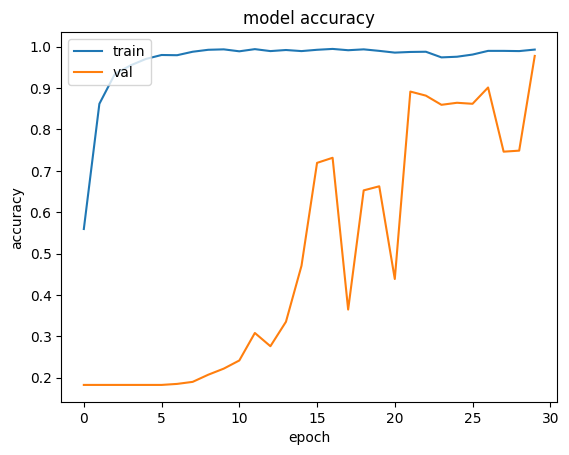

In [ ]:
# plot the accuracy plot
plt.plot(fruit_class_model.history['accuracy'])
plt.plot(fruit_class_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# save model
model.save("/content/drive/MyDrive/alexnet_model.h5")

In [ ]:
# custom function - prediction
def run(source = None):
    model = tf.keras.models.load_model('/content/drive/MyDrive/alexnet_model.h5')
    img = imageio.imread(source)
    img = Image.fromarray(img).resize((250, 250)).convert('RGB')
    x = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    #x = x/255
    prediction = model.predict(x)
    print("Predicted Image is:",target_names[np.argmax(prediction)])

# make prediction on unseen data
run(source='/content/drive/MyDrive/store sign 2/test/뚝배기스파게티/스크린샷 2024-08-01 오후 2.41.41.png' )

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Image is: 뚝배기스파게티
